## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
        
    callback = myCallback()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
    x_train = x_train / 255.
    y_train = y_train.astype(np.float64)
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting 
    history = model.fit(x_train, y_train, epochs=10,  # YOUR CODE SHOULD START HERE
              callbacks=[callback]# YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['accuracy'][-1]

In [3]:
train_mnist()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2255 - accuracy: 0.9335
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0964 - accuracy: 0.9703
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0682 - accuracy: 0.9783
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0513 - accuracy: 0.9835
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0427 - accuracy: 0.9858
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0335 - accuracy: 0.9892
Epoch 7/10
59392/60000 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9905
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0292 - accuracy: 0.9905


([0, 1, 2, 3, 4, 5, 6], 0.99048334)

In [3]:
a = np.array([1,2,3,4])
a.dtype

dtype('int32')

In [4]:
a = a.astype(np.float64)
a.dtype

dtype('float64')

In [6]:
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [12]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [38]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

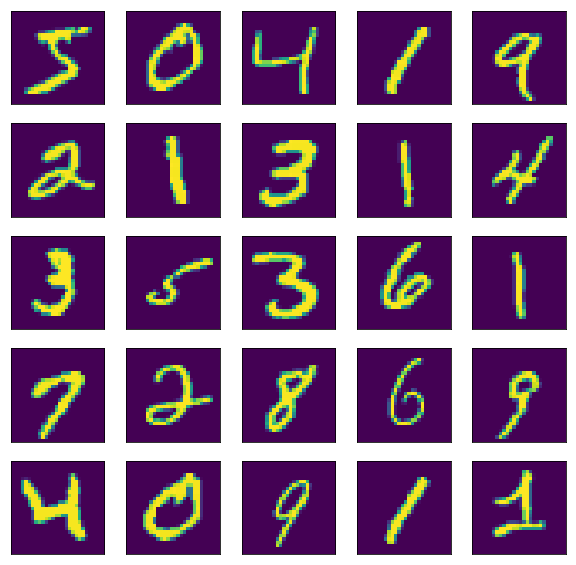

In [11]:
fig, axes = plt.subplots(5,5,figsize=(10,10))
fig.set_facecolor('white')
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()